In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
first_df = pd.read_csv("C:/Users/js2-3/Desktop/data2/전국_평균_분양가격(2013년_9월부터_2015년_8월까지).csv", encoding='cp949')
first_df.head(5)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [3]:
last_df = pd.read_csv("C:/Users/js2-3/Desktop/data2/주택도시보증공사_전국_평균_분양가격(2019년_12월).csv", encoding='cp949')
last_df.head(5)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
# 파일 내에 있는 null 값의 개수 확인ㄴ
last_df.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [5]:
last_df['분양가격'] = pd.to_numeric(last_df['분양가격(㎡)'], errors='coerce')
last_df['분양가격'].astype('Float64')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331      <NA>
4332    3898.0
4333      <NA>
4334    3601.0
Name: 분양가격, Length: 4335, dtype: Float64

In [6]:
print(f"분양가격 합:\t{last_df['분양가격'].sum(): .0f}0000원")
print(f"분양가격 평균:\t{last_df['분양가격'].mean() : .0f}0000원")

분양가격 합:	 128132750000원
분양가격 평균:	 32380000원


In [7]:
last_df['평당분양가격'] = round(last_df['분양가격'] * 3.3)

In [8]:
last_df

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.0
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19411.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.0
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19401.0
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12811.0
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.0
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


In [9]:
# 특정 column의 값 종류(unique)와 그 개수(nunique)를 출력
last_df['규모구분'].unique(), last_df['규모구분'].nunique()

(array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
        '전용면적 102㎡초과'], dtype=object),
 5)

In [10]:
#df['날짜'] = df['날짜'].str.replace('년', '-').str.replace('월', '-').str.replace('일', '')
last_df['전용면적'] = last_df['규모구분'].str.replace('전용면적', '').str.replace('초과', '~').str.replace('이하', '').str.replace(' ', '')

In [11]:
last_df3 = last_df.drop('분양가격(㎡)', axis=1).drop('분양가격', axis=1).drop('규모구분', axis=1)
last_df3

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.0,전체
1,서울,2015,10,18652.0,60㎡
2,서울,2015,10,19411.0,60㎡~85㎡
3,서울,2015,10,18879.0,85㎡~102㎡
4,서울,2015,10,19401.0,102㎡~
...,...,...,...,...,...
4330,제주,2019,12,12811.0,전체
4331,제주,2019,12,NaN,60㎡
4332,제주,2019,12,12863.0,60㎡~85㎡
4333,제주,2019,12,NaN,85㎡~102㎡


In [12]:
last_df = last_df3

In [13]:
# 지역별 평단분양가격의 평균 출력
round(last_df.groupby(['지역명'])['평당분양가격'].mean())

지역명
강원     7891.0
경기    13357.0
경남     9269.0
경북     8377.0
광주     9952.0
대구    11981.0
대전    10253.0
부산    12087.0
서울    23600.0
세종     9797.0
울산    10015.0
인천    11915.0
전남     7565.0
전북     7724.0
제주    11241.0
충남     8234.0
충북     7635.0
Name: 평당분양가격, dtype: float64

In [14]:
# groupby를 사용하여 전용면적 == 전체 인 데이터만 지역별 평당분양가격의 평균 산출
round(last_df[last_df['전용면적'] == '전체'].groupby(['지역명'])['평당분양가격'].mean())

지역명
강원     7478.0
경기    12560.0
경남     8659.0
경북     8078.0
광주     9904.0
대구    11771.0
대전     9786.0
부산    11936.0
서울    22610.0
세종     9805.0
울산    10493.0
인천    11257.0
전남     7284.0
전북     7293.0
제주    10785.0
충남     7815.0
충북     7219.0
Name: 평당분양가격, dtype: float64

In [15]:
last_df.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack().round(-1).T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8310.0,14770.0,10360.0,9160.0,11040.0,13090.0,14880.0,13210.0,23450.0,10110.0,9970.0,14360.0,8170.0,8190.0,10520.0,8690.0,8200.0
60㎡,7570.0,13250.0,8690.0,7880.0,9430.0,11990.0,9180.0,11350.0,23210.0,9320.0,9200.0,11240.0,7210.0,7610.0,14020.0,7910.0,7100.0
60㎡~85㎡,7490.0,12520.0,8620.0,8060.0,9910.0,11780.0,9710.0,11860.0,22790.0,9780.0,10500.0,11380.0,7270.0,7270.0,10620.0,7820.0,7260.0
85㎡~102㎡,8750.0,13680.0,10020.0,8770.0,9300.0,11140.0,9040.0,12070.0,25940.0,9850.0,8860.0,11530.0,7910.0,8280.0,10710.0,9120.0,8390.0
전체,7480.0,12560.0,8660.0,8080.0,9900.0,11770.0,9790.0,11940.0,22610.0,9810.0,10490.0,11260.0,7280.0,7290.0,10780.0,7820.0,7220.0


In [16]:
# T: 전치 행렬
last_df.groupby(['연도', '전용면적'])['평당분양가격'].mean().unstack().T

연도,2015,2016,2017,2018,2019
전용면적,,,,,
102㎡~,9837.222222,10388.680628,11334.467033,11445.627119,13331.505376
60㎡,8951.520833,9398.855721,10246.172222,10844.331522,11506.752809
60㎡~85㎡,8891.843137,9295.965686,9824.973262,10650.615764,11677.229592
85㎡~102㎡,9518.458333,10122.331522,10540.404908,11441.664474,12980.660256
전체,8892.980392,9293.000000,9901.267380,10675.798030,11602.719388


In [17]:
# pivot_table을 이용해서 지역별 평당분양가격의 평균
# pivot_table을 이용해서 전용면적별 평당분양가격의 평균
# pivot_table을 이용해서 전용면적, 지역별 평당분양가격의 평균

In [18]:
last_df.pivot_table(index='지역명', values='평당분양가격', aggfunc='max').round(-1).T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,11870.0,18710.0,14200.0,11410.0,16110.0,17020.0,16090.0,15260.0,42000.0,12970.0,11860.0,17120.0,10080.0,10070.0,18020.0,10560.0,9420.0


In [19]:
last_df.pivot_table(index='전용면적', values='평당분양가격', aggfunc='max').round(-1).T

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
평당분양가격,29660.0,27330.0,28340.0,42000.0,26730.0


In [20]:
last_df.pivot_table(index=['전용면적'], columns=['지역명'], values='평당분양가격', aggfunc='mean').round(-1)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8310.0,14770.0,10360.0,9160.0,11040.0,13090.0,14880.0,13210.0,23450.0,10110.0,9970.0,14360.0,8170.0,8190.0,10520.0,8690.0,8200.0
60㎡,7570.0,13250.0,8690.0,7880.0,9430.0,11990.0,9180.0,11350.0,23210.0,9320.0,9200.0,11240.0,7210.0,7610.0,14020.0,7910.0,7100.0
60㎡~85㎡,7490.0,12520.0,8620.0,8060.0,9910.0,11780.0,9710.0,11860.0,22790.0,9780.0,10500.0,11380.0,7270.0,7270.0,10620.0,7820.0,7260.0
85㎡~102㎡,8750.0,13680.0,10020.0,8770.0,9300.0,11140.0,9040.0,12070.0,25940.0,9850.0,8860.0,11530.0,7910.0,8280.0,10710.0,9120.0,8390.0
전체,7480.0,12560.0,8660.0,8080.0,9900.0,11770.0,9790.0,11940.0,22610.0,9810.0,10490.0,11260.0,7280.0,7290.0,10780.0,7820.0,7220.0


In [21]:
last_df.pivot_table(index=['연도', '지역명'], values='평당분양가격', aggfunc='mean').round(-1).reset_index().set_index('연도').head(20)

,지역명,평당분양가격
연도,,
2015,강원,7190.0
2015,경기,11060.0
2015,경남,8460.0
2015,경북,7460.0
2015,광주,7920.0
2015,대구,9020.0
2015,대전,8190.0
2015,부산,10380.0
2015,서울,20320.0


In [22]:
g = last_df.groupby(['지역명'])['평당분양가격'].mean().to_frame()

<Axes: xlabel='지역명'>

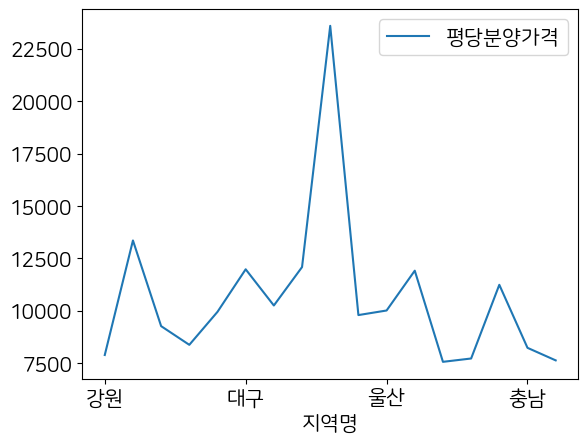

In [23]:
g.plot()

<Axes: xlabel='지역명'>

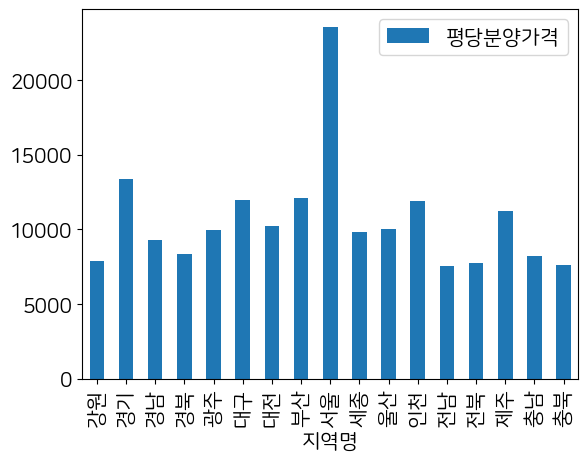

In [24]:
g.plot(kind='bar')

<Axes: >

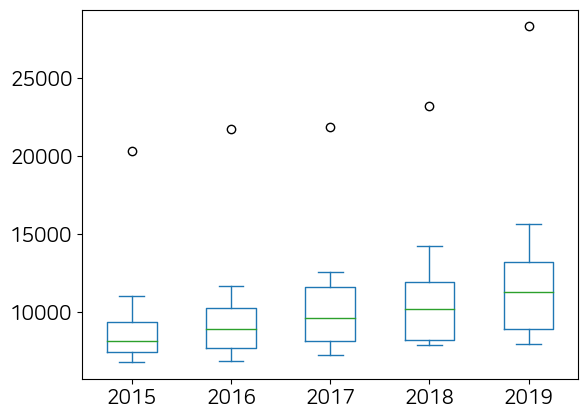

In [25]:
g = last_df.pivot_table(columns='연도', index='지역명', values='평당분양가격')
g.plot(kind='box')


In [28]:
# melt를 이용해서 월별 데이터를 '기간' 컬럼으로, 가격은 '평당분양가격'
first_df_melt = first_df.melt(id_vars=['지역'], var_name='기간', value_name='평당분양가격')
first_df_melt

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [30]:
# '기간' 컬럼의 값을 '연도', '월'로 분리 후 last_df와 자료형을 맞춰줌
first_df_melt['연도'] = first_df_melt['기간'].str.split('년').str[0].astype(int)
first_df_melt['월'] = first_df_melt['기간'].str.split('년').str[1].str.replace('월', '').astype(int)
first_df_melt

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [33]:
# last_df에서 전용면적이 '전체'인 데이터만 추출
condition = last_df['전용면적'] == '전체'
last_df_result = last_df[condition]

In [37]:
# 두개의 데이터 프레임 통합

# 1. 두개의 데이터셋 확인
print(last_df_result.head(2))
print(first_df_melt.head(2))
# 2. 컬럼 이름 맞추기
last_df_result.rename(columns={'지역명': '지역'}, inplace=True)
# 3. concat을 통해 표 합치기
first = first_df_melt[['지역', '연도', '월', '평당분양가격']]
last = last_df_result[['지역', '연도', '월', '평당분양가격']]
final_df = pd.concat([first, last])
final_df

  지역명    연도   월   평당분양가격 전용면적
0  서울  2015  10  19275.0   전체
5  인천  2015  10  10438.0   전체
   지역        기간  평당분양가격    연도   월
0  서울  2013년12월   18189  2013  12
1  부산  2013년12월    8111  2013  12


C:\Users\js2-3\AppData\Local\Temp\ipykernel_2700\2081737986.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_df_result.rename(columns={'지역명': '지역'}, inplace=True)


,지역,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.0
4315,전남,2019,12,8092.0
4320,경북,2019,12,9616.0
4325,경남,2019,12,10108.0
